# Задание 3.

Загрузите [данные по изменению температуры поверхности земли](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). Для этого может понадобится зарегистрироваться на [Kaggle](https://kaggle.com). Затем нужно будет работать с данными, которые содержатся в файле **GlobalLandTemperaturesByMajorCity.csv**

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import zipfile

%matplotlib inline

with zipfile.ZipFile("archive.zip") as z:
    with z.open("GlobalLandTemperaturesByMajorCity.csv") as f:
        df = pd.read_csv(f, parse_dates=["dt"])


# Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый `DataFrame`, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.  

In [260]:
df_mini = df[df.dt >= '1950-01-01']
df_mini

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1212,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


# Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.

In [261]:
df_toronto_yearly_mean = df_mini[df_mini.City == 'Toronto'].groupby((pd.Grouper(key='dt', axis=0, 
                      freq='Y'))).mean()
df_toronto_yearly_mean = df_toronto_yearly_mean.reset_index()
df_toronto_yearly_mean.head()


C:\Users\admin\AppData\Local\Temp\ipykernel_109768\1050743481.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,dt,AverageTemperature,AverageTemperatureUncertainty
0,1950-12-31,5.639583,0.235167
1,1951-12-31,6.259083,0.313250
2,1952-12-31,7.013417,0.231333
3,1953-12-31,7.506250,0.205583
4,1954-12-31,6.243083,0.275083


<AxesSubplot: xlabel='dt'>

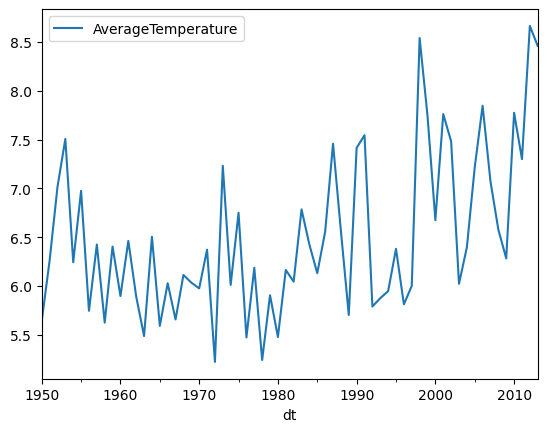

In [262]:
df_toronto_yearly_mean.plot(x="dt", y="AverageTemperature")

# Задание 3.3 (2 балла)

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна. 

In [263]:
df_mini_Var = df_mini.groupby(["City"]).AverageTemperature.var().reset_index()
df_mini_Var = df_mini_Var.rename(columns = {"AverageTemperature":"VarTemperature"})
df_mini_Var[df_mini_Var.VarTemperature==max(df_mini_Var.VarTemperature)]

,City,VarTemperature
34,Harbin,218.898616


# Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:
1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).

In [264]:
df_mini = pd.merge(df_mini, df_mini_Var, on="City", how="left")
df_mini.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,VarTemperature
0,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W,1.872387
1,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W,1.872387
2,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W,1.872387
3,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W,1.872387
4,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W,1.872387


In [ ]:
df_mini["Longitude"][df_mini["Longitude"].str.contains('E', case=True)] = df_mini.Longitude[df_mini["Longitude"].str.contains("E", case=True)].str.replace("E"," ").astype(float)
df_mini["Longitude"][df_mini["Longitude"].str.contains('W', case=True, na=False)] = df_mini.Longitude[df_mini["Longitude"].str.contains("W", case=True, na=False)].str.replace("W"," ").astype(float)*(-1)
df_mini["Latitude"][df_mini["Latitude"].str.contains('N', case=True)] = df_mini.Latitude[df_mini["Latitude"].str.contains('N', case=True)].str.replace("N"," ").astype(float)
df_mini["Latitude"][df_mini["Latitude"].str.contains('S', case=True,na=False)] = df_mini.Latitude[df_mini["Latitude"].str.contains('S', case=True, na=False)].str.replace("S"," ").astype(float)*(-1)
df_mini.head()

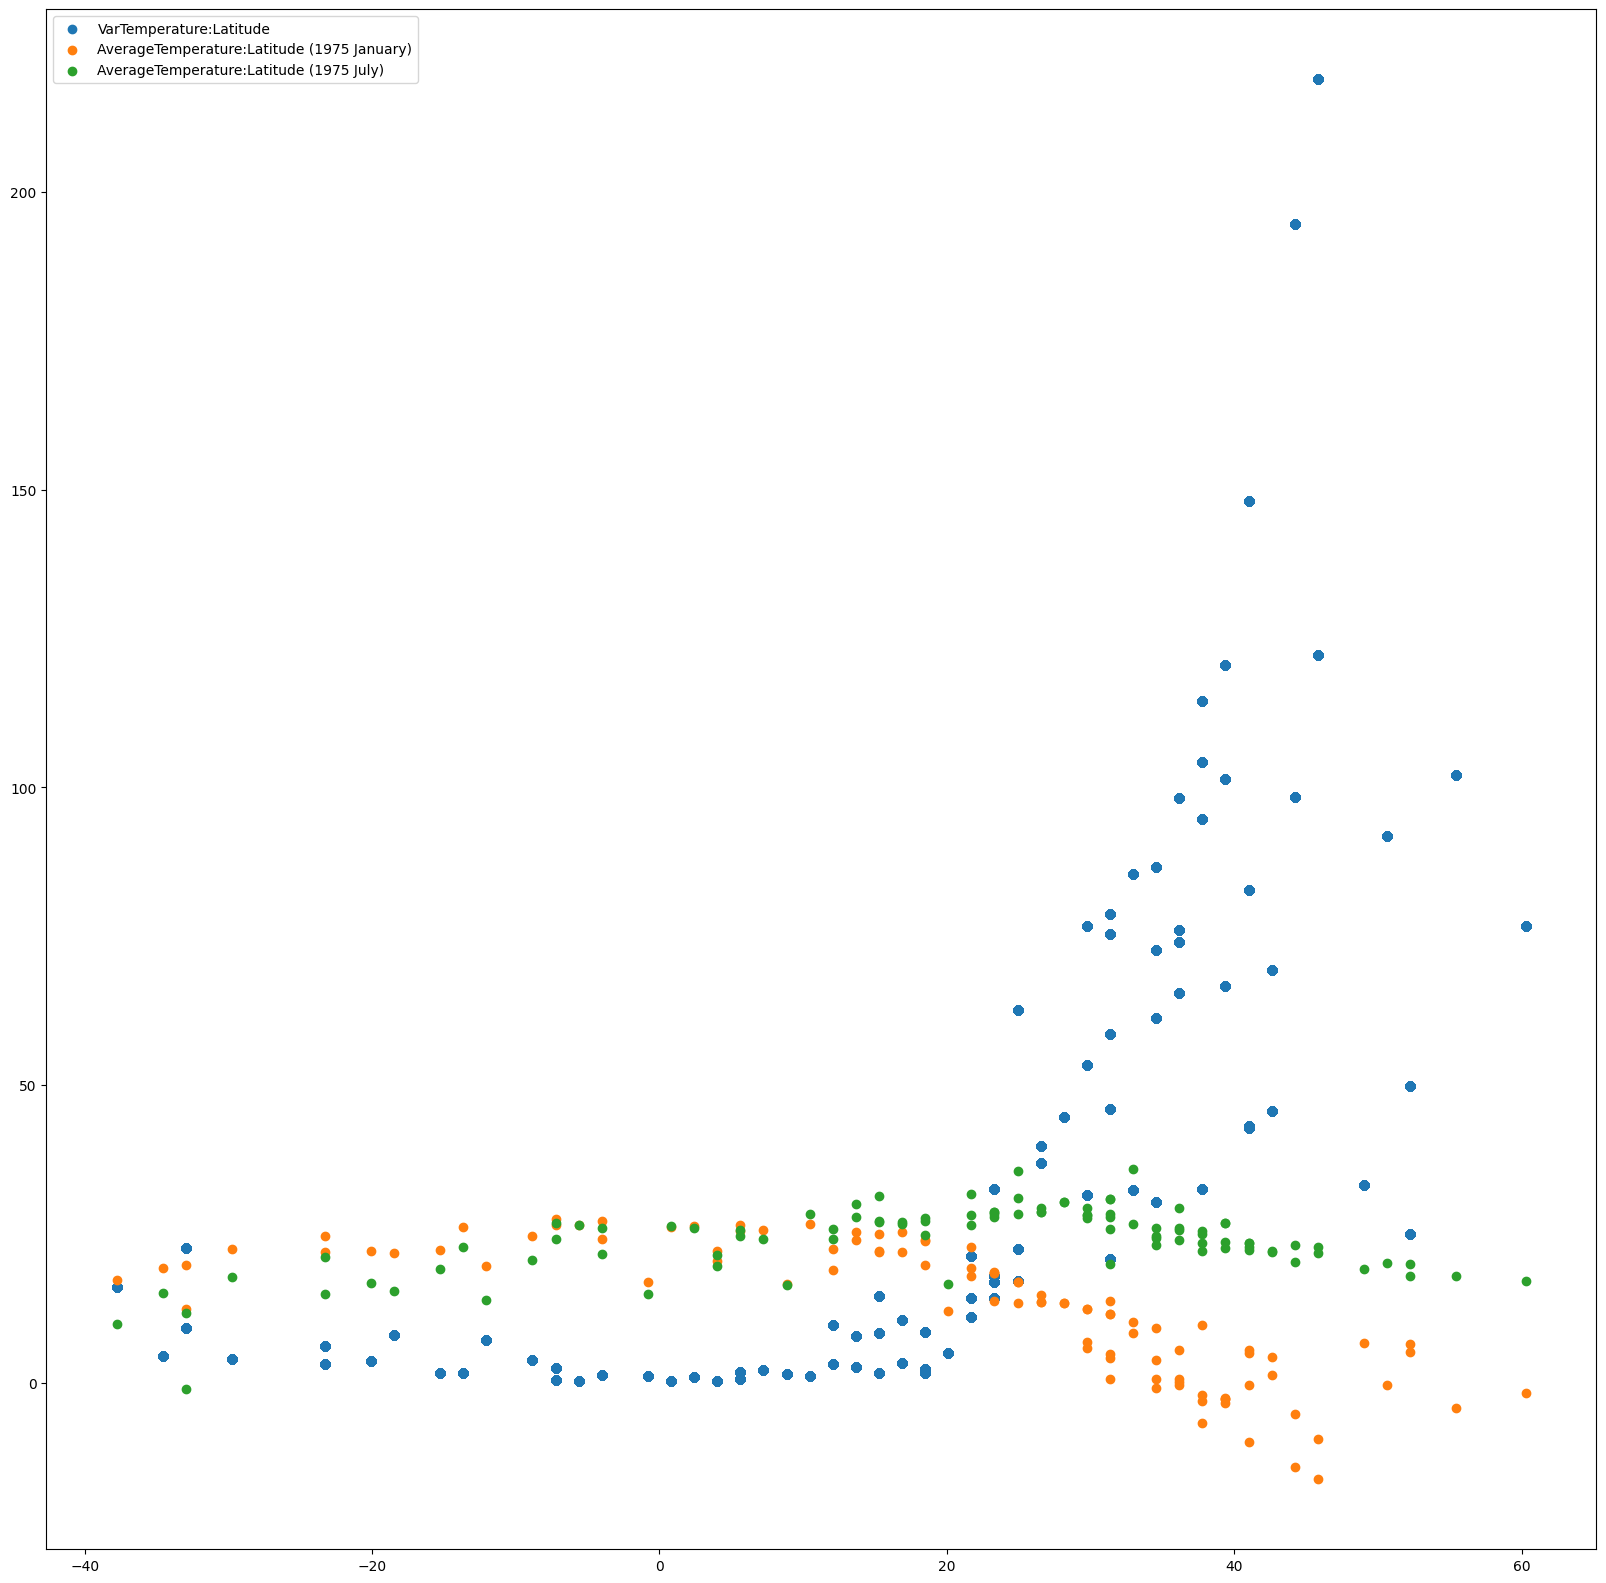

In [266]:
# 1) Северная широта обозначена в положительных значениях по оси Ox, а южная в отрицательных
plt.figure(figsize=(20, 20))
plt.scatter(df_mini.Latitude, df_mini.VarTemperature, label="VarTemperature:Latitude")

# 2) 
plt.scatter(df_mini.Latitude[df_mini["dt"] == "1975-01-01"], df_mini.AverageTemperature[df_mini["dt"] == "1975-01-01"], label="AverageTemperature:Latitude (1975 January)")

# 3)
plt.scatter(df_mini.Latitude[df_mini["dt"] == "1975-07-01"], df_mini.AverageTemperature[df_mini["dt"] == "1975-07-01"], label="AverageTemperature:Latitude (1975 July)")
plt.legend()
plt.show()

# Задание 3.5 (6 баллов)

Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем  и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом). 

Постройте модель линейной регрессии (можно использовать [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)): $\mathbb{год} \rightarrow \mathbb{средняя\_температура}$. Отобразите прямую на предыдущем графике. 

In [275]:
def calculate_slope(x, y):
    mx = x - x.mean()
    my = y - y.mean()
    return sum(mx * my) / sum(mx**2)

def get_params(x, y):    
    a = calculate_slope(x, y)
    b = y.mean() - a * x.mean()
    return a, b

Years:  [1953 1957 1959 1961 1964 1967 1972 1975 1977 1979 1983 1986 1989 1992
 1995 1997 2000 2002 2005 2008 2011]


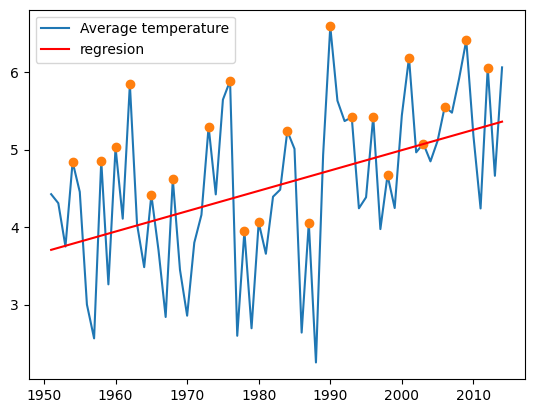

In [276]:
df_peter_yearly_mean = df_mini[df_mini.City == 'Saint Petersburg'].groupby((pd.Grouper(key='dt', axis=0, 
                      freq='Y')))["AverageTemperature"].mean()
df_peter_yearly_mean = df_peter_yearly_mean.reset_index()
plt.plot(df_peter_yearly_mean["dt"], df_peter_yearly_mean["AverageTemperature"], label='Average temperature')
df_peter_yearly_mean_special = df_peter_yearly_mean
df_peter_yearly_mean_special["previous"] = df_peter_yearly_mean["AverageTemperature"].diff(1)
df_peter_yearly_mean_special["next"] = df_peter_yearly_mean["AverageTemperature"].diff(-1)

df_peter_yearly_mean_special.head()
x = df_peter_yearly_mean_special.dt[(df_peter_yearly_mean_special.next>0) & (df_peter_yearly_mean_special.previous>0)]
y = df_peter_yearly_mean_special.AverageTemperature[(df_peter_yearly_mean_special.next>0) & (df_peter_yearly_mean_special.previous>0)]

x_lin = pd.Series(pd.DatetimeIndex(df_peter_yearly_mean["dt"]).year.tolist())
y_lin = df_peter_yearly_mean.AverageTemperature
a, b = get_params(x_lin, y_lin)
lin_reg = a*x_lin + b

print("Years: ", pd.DatetimeIndex(x).year.values)
plt.plot(x, y, 'o')
plt.plot(df_peter_yearly_mean["dt"], lin_reg, color='red', label='regresion')
plt.legend()
plt.show()

# Задание 3.6 (4 балла)

Найдите города, для которых: 
1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
2. Самая большая средняя разница между средней температурой января и средней температурой июля.
3. Наибольшее среднее значение месяцев с отрицательной температурой в году.

In [289]:
# 1 Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна
df_mini_yearly = df_mini.groupby(["City", pd.Grouper(key='dt', axis=0, freq='Y')])["AverageTemperature"].mean().reset_index()
df_mini_yearly_maxOfDiff = df_mini_yearly.groupby(["City"])["AverageTemperature"].agg(['min', 'max']).diff(axis=1).reset_index() 
df_mini_yearly_maxOfDiff[df_mini_yearly_maxOfDiff["max"] == df_mini_yearly_maxOfDiff["max"].max()]

,City,min,max
60,Mashhad,NaN,5.25


In [279]:
# 2 Самая большая средняя разница между средней температурой января и средней температурой июля

df_mini_JaJu = df_mini[(pd.DatetimeIndex(df_mini['dt']).month == 1) | (pd.DatetimeIndex(df_mini['dt']).month == 7)]
df_mini_JaJu["diff"] = df_mini_JaJu.AverageTemperature.diff()
df_mini_JaJu = df_mini_JaJu[pd.DatetimeIndex(df_mini_JaJu['dt']).month == 7]
df_mini_JaJu.loc["diff"]=df_mini_JaJu["diff"].abs()
df_mini_JaJu_AvDiff = df_mini_JaJu.groupby(["City"])["diff"].mean().reset_index()
df_mini_JaJu_AvDiff[df_mini_JaJu_AvDiff["diff"]==df_mini_JaJu_AvDiff["diff"].max()]


C:\Users\admin\AppData\Local\Temp\ipykernel_109768\2202322701.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,City,diff
34,Harbin,41.992719


In [290]:
#3 Наибольшее среднее значение месяцев с отрицательной температурой в году

df_mini_neg = df_mini[df_mini.AverageTemperature < 0].groupby(["City", pd.Grouper(key='dt', axis=0, freq='Y')])["AverageTemperature"].count().reset_index()
df_mini_neg = df_mini_neg.groupby(["City"])["AverageTemperature"].mean().reset_index()
df_mini_neg[df_mini_neg.AverageTemperature==df_mini_neg.AverageTemperature.max()]

,City,AverageTemperature
6,Harbin,4.90625


# Задание 3.7 (3 балла)

Отобразите города на карте, например с помощью [geopandas/folium](https://geopandas.org/en/stable/gallery/plotting_with_folium.html) или [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html). Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет. 


**\***(+3 балла). Вычислите прямую с "трендом" по изменению температуры в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании **3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой. 


**\***(+1 балл) Используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и угол наклона последнего сегмента. 

In [291]:
%pip install pwlf


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for pwlf, since package 'wheel' is not installed.
Using legacy 'setup.py install' for pyDOE, since package 'wheel' is not installed.
  Running setup.py install for pyDOE: started
  Running setup.py install for pyDOE: finished with status 'done'
  Running setup.py install for pwlf: started
  Running setup.py install for pwlf: finished with status 'done'


In [272]:
import plotly.express as px

df_mini_10Y_Jan = df_mini[(df_mini['dt'] >= '2003-01-01') & (pd.DatetimeIndex(df_mini['dt']).month == 1)].groupby(['City', 'Latitude', 'Longitude'])['AverageTemperature'].mean().reset_index()
df_mini_10Y_Jan

fig = px.scatter_geo(df_mini_10Y_Jan, 
                     lon="Longitude",
                     lat="Latitude",
                     color="AverageTemperature", 
                     hover_name="City" 
                    )
fig.show()

**\***(+3 балла). Вычислите прямую с "трендом" по изменению температуры в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании **3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой. 

In [273]:
from sklearn.linear_model import LinearRegression

def get_coef(city_df): 
    x = np.array(pd.Series(pd.DatetimeIndex(city_df["dt"]).year.tolist())).reshape(-1, 1)
    y = np.array(city_df.AverageTemperature)
    reg = LinearRegression().fit(x,y)    
    return reg.coef_[0]

In [274]:
df_mini_angle = df_mini.groupby(["City", 'Latitude', 'Longitude', pd.Grouper(key='dt', axis=0, freq='Y')]).AverageTemperature.mean().reset_index()
angle = df_mini_angle.groupby(["City", 'Latitude', 'Longitude']).apply(get_coef).reset_index()

fig = px.scatter_geo(angle, 
                     lon="Longitude",
                     lat="Latitude",
                     color=0, 
                     hover_name="City" 
                    )
fig.show()

In [317]:
def func(df):
    x = np.array(pd.Series(pd.DatetimeIndex(df["dt"]).year.tolist()))
    y = np.array(df.AverageTemperature)
    lm = pwlf.PiecewiseLinFit(x,y)  
    reg = lm.fit(4)
    return lm.slopes[-1]

In [ ]:
import pwlf

df_mini_pwlf = df_mini.groupby(["City", 'Latitude', 'Longitude', pd.Grouper(key='dt', axis=0, freq='Y')]).AverageTemperature.mean().reset_index()
df_mini_pwlf = df_mini_pwlf.groupby(["City", 'Latitude', 'Longitude']).apply(func).reset_index()
df_mini_pwlf


In [319]:
fig = px.scatter_geo(df_mini_pwlf, 
                     lon="Longitude",
                     lat="Latitude",
                     color=0, 
                     hover_name="City" 
                    )
fig.show()

# *Задание 3.8 (8 баллов)

Цель - создать проект, который как минимум включает:
1. Использование юнит-тестов ([pytest](https://pytest.org)).
2. Применение средств форматирования и проверки исходного кода (например: [isort](https://pycqa.github.io/isort/), [black](https://black.readthedocs.io/en/stable/), [flake8](https://flake8.pycqa.org/en/latest/), [mypy](https://mypy.readthedocs.io/en/stable/)).
3. Спецификацию проекта в [pyproject.toml](https://pip.pypa.io/en/stable/reference/build-system/pyproject-toml/).
4. Использование утилит для работы с командной строкой ([argparse](https://docs.python.org/3/library/argparse.html), [click](https://click.palletsprojects.com/en/8.1.x/) и т.п.)
5. Сборку проекта в Wheel-файл.

Проект должен быть загружен в репозиторий. Функционал - произвольный, но должны использоваться данные из этого домашнего задания. Сам файл передается в качестве первого аргумента командной строки.  Например:

> python3 -m homeproject.app GlobalLandTemperaturesByMajorCity.csv 1980

Выдает самый жаркий месяц и город по наблюдениям за 1980 год.

*Ссылка на проект*